In [23]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt

In [24]:
batch_size = 128
num_classes = 10
epochs = 20

In [25]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [26]:
def show_samples(samples, labels):
    """
    display 16 samples and labels
    """
    plt.figure(figsize=(12, 12))
    for i in range(len(samples)):
        plt.subplot(4, 4, i+1)
        plt.imshow(samples[i], cmap='gray')
        plt.title(labels[i])
    plt.show()

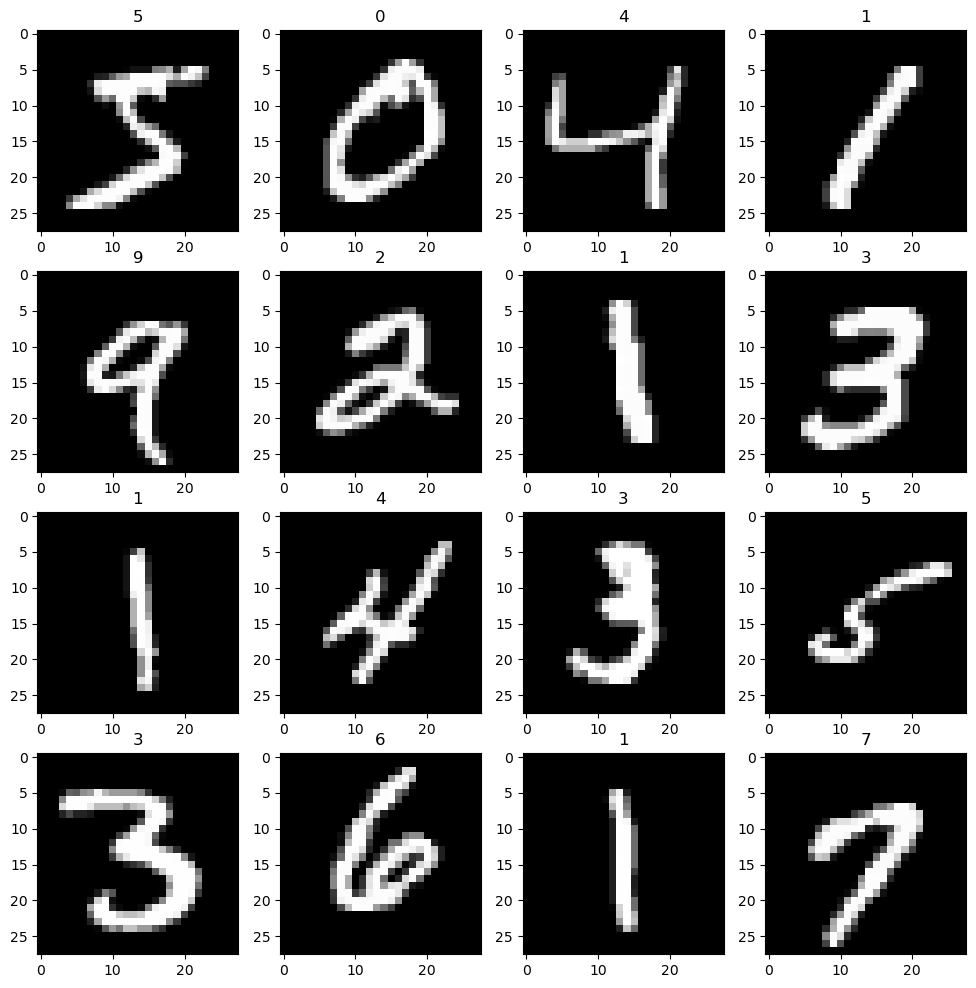

2.12.0
2.12.0


In [27]:
show_samples(x_train[:16], y_train[:16])
import tensorflow as tf
print(tf.__version__)
print(keras.__version__)

In [28]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# 将样本归一化
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)


(60000, 784) (10000, 784)
(60000, 10) (10000, 10)


In [29]:
model = Sequential()
model.add(Dense(15, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
### print the keys contained in the history object
print(history.history.keys())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 15)                11775     
                                                                 
 dense_11 (Dense)            (None, 10)                160       
                                                                 
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20


/home/mc/anaconda3/lib/python3.11/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


469/469 [==============================] - 1s 1ms/step - loss: 1.4702 - accuracy: 0.5983 - val_loss: 0.8892 - val_accuracy: 0.7704
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 0.7141 - accuracy: 0.8169 - val_loss: 0.5699 - val_accuracy: 0.8564
Epoch 3/20
469/469 [==============================] - 0s 1ms/step - loss: 0.5281 - accuracy: 0.8636 - val_loss: 0.4620 - val_accuracy: 0.8797
Epoch 4/20
469/469 [==============================] - 0s 1ms/step - loss: 0.4521 - accuracy: 0.8789 - val_loss: 0.4090 - val_accuracy: 0.8900
Epoch 5/20
469/469 [==============================] - 0s 1ms/step - loss: 0.4117 - accuracy: 0.8880 - val_loss: 0.3782 - val_accuracy: 0.8955
Epoch 6/20
469/469 [==============================] - 0s 1ms/step - loss: 0.3862 - accuracy: 0.8930 - val_loss: 0.3584 - val_accuracy: 0.8993
Epoch 7/20
469/469 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8972 - val_loss: 0.3443 - val_accuracy: 0.9030
Epoch 8/20
469/46

In [30]:
def plot_training(history):
    ### plot the training and validation loss for each epoch
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model mean squared error loss')
    plt.ylabel('mean squared error loss')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='upper right')
    plt.show()

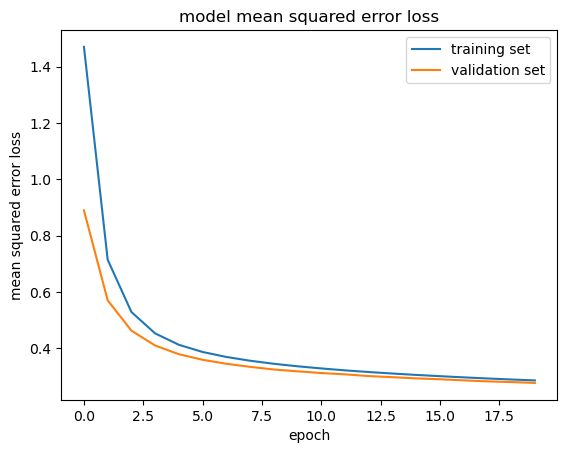

In [31]:
plot_training(history=history)

In [32]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2762124538421631
Test accuracy: 0.9225999712944031


## 3层网络的一点小变动——深度前馈神经网络：

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2464 - accuracy: 0.9234 - val_loss: 0.1135 - val_accuracy: 0.9645
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1032 - accuracy: 0.9687 - val_loss: 0.0897 - val_accuracy: 0.9728
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0767 - accuracy: 0.9765 - val_loss: 0.0740 - val_accuracy: 0.9795
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0589 - accuracy: 0.9830 - val_loss: 0.0750 - val_accuracy: 0.9798
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0483 - accuracy: 0.9847 - val_loss: 0.0783 - val_accuracy: 0.9805
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0447 - accuracy: 0.9870 - val_loss: 0.0714 - val_accuracy: 0.9806
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0388 - accuracy: 0.9883 - val_loss: 0.0890 - val_accuracy: 0.9803
Epoch 

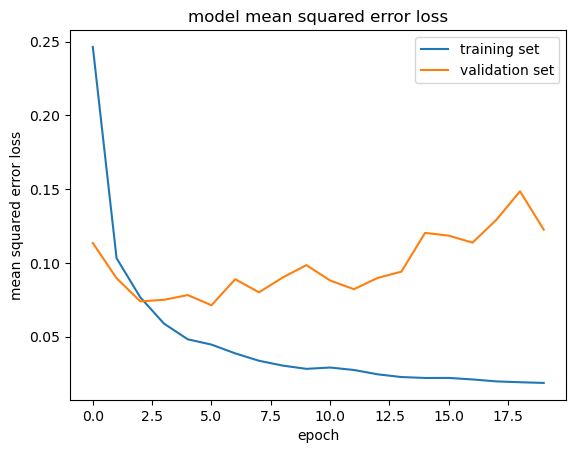

2024-04-04 14:15:59.187084: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2024-04-04 14:15:59.195670: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2024-04-04 14:15:59.286444: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2024-04-04 14:15

INFO:tensorflow:Assets written to: model.json/assets
Test loss: 0.12259837985038757
Test accuracy: 0.9848999977111816


In [33]:
from keras.layers import Dropout
from keras.optimizers import RMSprop

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

### print the keys contained in the history object
print(history.history.keys())
plot_training(history=history)
model.save('model.json')

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [34]:
import numpy as np
result = model.predict(x_test[:16])
result = np.argmax(result, 1)
print('predict: ', result)
true = np.argmax(y_test[:16], 1)
print('true: ', true)

1/1 [==============================] - 0s 47ms/step
predict:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5]
true:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5]


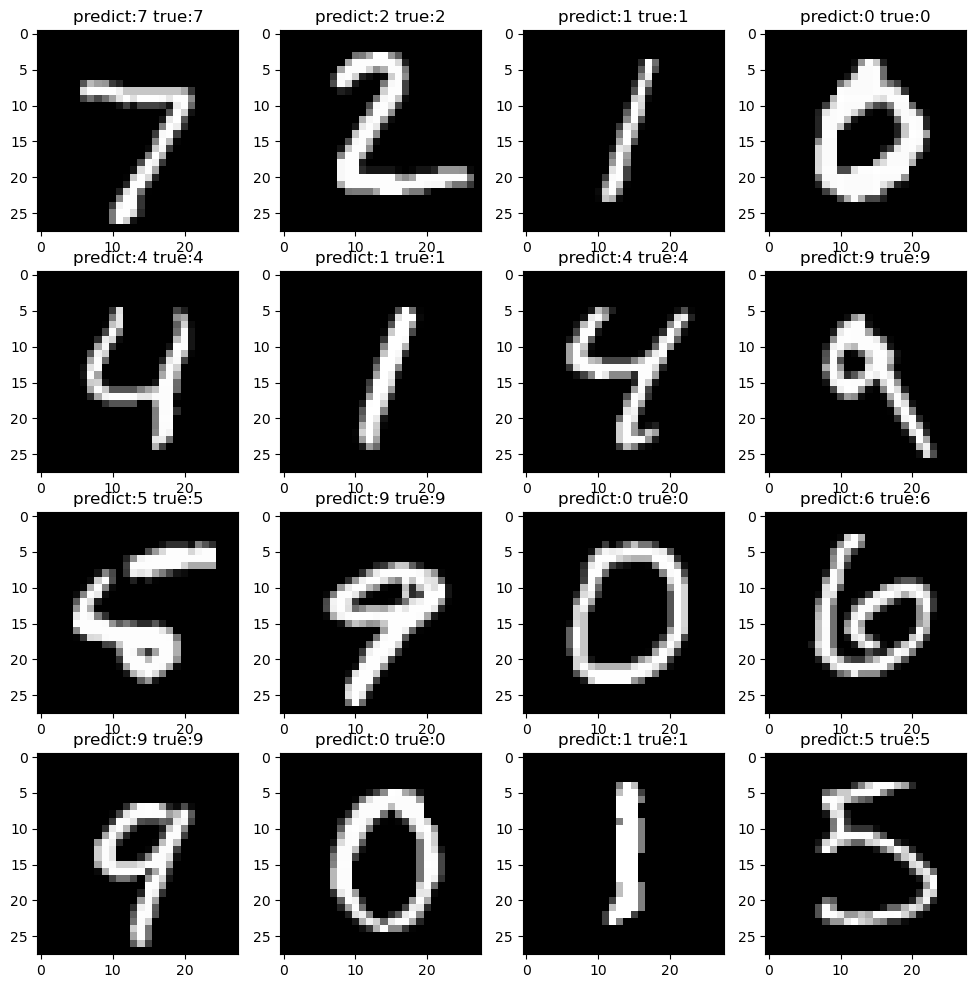

In [35]:
fig2 = plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_test[i].reshape((28, 28)), cmap='gray')
    plt.title('predict:'+str(result[i])+' true:'+str(true[i]))
plt.show()